<a href="https://colab.research.google.com/github/sb2356-iiitr/Bike-Sharing-Demand/blob/main/Bike_Sharing_Demand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Steps to solve the problem.



1.   Read the data
2.   Preliminary analysis of the data and drop obvious features
3.   Visualise the data
4.   Check Multiple Linear Regression Assumptions


*   Normality
*   Linear Correlation
*   Multicollinearity
*   Autocorrelation
*   Sample Size

5.  Drop irrelevant features
6.  Create/modify more features
7.  Create Dummy Variables
8.  Train and test split
9.  Fit and score the model
10. Present the results





### Step 0
Import the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

### Step 1
Read the data

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving hour.csv to hour.csv
User uploaded file "hour.csv" with length 1156742 bytes


In [3]:
bikes = pd.read_csv('hour.csv')
bikes.head()

,index,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,demand
0,1,01-01-2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,01-01-2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,01-01-2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,01-01-2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,01-01-2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
bikes.shape

(17379, 17)

In [5]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       17379 non-null  int64  
 1   date        17379 non-null  object 
 2   season      17379 non-null  int64  
 3   year        17379 non-null  int64  
 4   month       17379 non-null  int64  
 5   hour        17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weather     17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  humidity    17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  demand      17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


### Step 2
Prelim Analysis and Feature Selection

In [6]:
bikes_prep = bikes.copy()

In [7]:
# Drop columns not required
bikes_prep = bikes_prep.drop(['index', 'date', 'casual', 'registered'], axis=1)

In [8]:
bikes_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  int64  
 1   year        17379 non-null  int64  
 2   month       17379 non-null  int64  
 3   hour        17379 non-null  int64  
 4   holiday     17379 non-null  int64  
 5   weekday     17379 non-null  int64  
 6   workingday  17379 non-null  int64  
 7   weather     17379 non-null  int64  
 8   temp        17379 non-null  float64
 9   atemp       17379 non-null  float64
 10  humidity    17379 non-null  float64
 11  windspeed   17379 non-null  float64
 12  demand      17379 non-null  int64  
dtypes: float64(4), int64(9)
memory usage: 1.7 MB


In [9]:
# Basic Checks for missing values
bikes_prep.isna().sum()

season        0
year          0
month         0
hour          0
holiday       0
weekday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
demand        0
dtype: int64

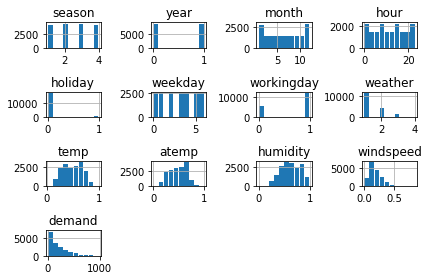

In [10]:
# Visualize the data using pandas histogram
bikes_prep.hist(rwidth = 0.9)
plt.tight_layout()

In [11]:
# IMPORTANT: Predicted variable demand is not normally distributed

### Step 3
Data Visualisation

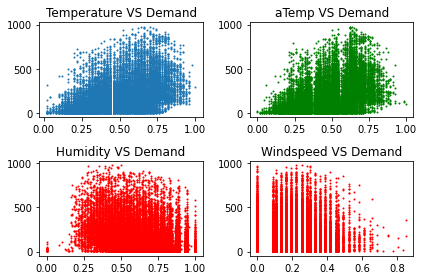

In [12]:
# Visualisation the continuous features vs demand

plt.subplot(2, 2, 1)
plt.title('Temperature VS Demand')
plt.scatter(bikes_prep['temp'], bikes_prep['demand'], s=1)

plt.subplot(2, 2, 2)
plt.title('aTemp VS Demand')
plt.scatter(bikes_prep['atemp'], bikes_prep['demand'], s=1, c='g')

plt.subplot(2, 2, 3)
plt.title('Humidity VS Demand')
plt.scatter(bikes_prep['humidity'], bikes_prep['demand'], s=1, c='r')

plt.subplot(2, 2, 4)
plt.title('Windspeed VS Demand')
plt.scatter(bikes_prep['windspeed'], bikes_prep['demand'], s=1, c='r')
plt.tight_layout()

In [13]:
# Plot the categorical variables vs demand

In [14]:
# Create a list of unique season's values
season_list = bikes_prep['season'].unique()

# Create average demand per season using groupby
season_average = bikes_prep.groupby('season').mean()['demand']

# Create a list of unique holiday's values
holiday_list = bikes_prep['holiday'].unique()

# Create average demand per holiday using groupby
holiday_average = bikes_prep.groupby('holiday').mean()['demand']

# Create a list of unique workingday's values
workingday_list = bikes_prep['workingday'].unique()

# Create average demand per workingday using groupby
workingday_average = bikes_prep.groupby('workingday').mean()['demand']

# Create a list of unique weather's values
weather_list = bikes_prep['weather'].unique()

# Create average demand per weather using groupby
weather_average = bikes_prep.groupby('weather').mean()['demand']

# Create a list of unique month's values
month_list = bikes_prep['month'].unique()

# Create average demand per month using groupby
month_average = bikes_prep.groupby('month').mean()['demand']

# Create a list of unique weekday's values
weekday_list = bikes_prep['weekday'].unique()

# Create average demand per weekday using groupby
weekday_average = bikes_prep.groupby('weekday').mean()['demand']

# Create a list of unique hour's values
hour_list = bikes_prep['hour'].unique()

# Create average demand per hour using groupby
hour_average = bikes_prep.groupby('hour').mean()['demand']

# Create a list of unique year's values
year_list = bikes_prep['year'].unique()

# Create average demand per year using groupby
year_average = bikes_prep.groupby('year').mean()['demand']

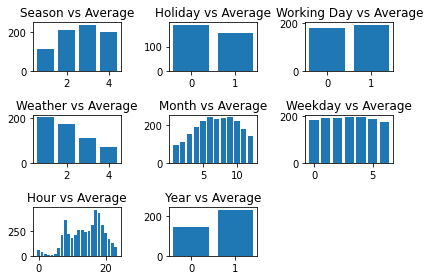

In [15]:
plt.subplot(3, 3, 1)
plt.title('Season vs Average')
plt.bar(season_list, season_average)

plt.subplot(3, 3, 2)
plt.title('Holiday vs Average')
plt.bar(holiday_list, holiday_average)

plt.subplot(3, 3, 3)
plt.title('Working Day vs Average')
plt.bar(workingday_list, workingday_average)

plt.subplot(3, 3, 4)
plt.title('Weather vs Average')
plt.bar(weather_list, weather_average)

plt.subplot(3, 3, 5)
plt.title('Month vs Average')
plt.bar(month_list, month_average)

plt.subplot(3, 3, 6)
plt.title('Weekday vs Average')
plt.bar(weekday_list, weekday_average)

plt.subplot(3, 3, 7)
plt.title('Hour vs Average')
plt.bar(hour_list, hour_average)

plt.subplot(3, 3, 8)
plt.title('Year vs Average')
plt.bar(year_list, year_average)

plt.tight_layout()

Features to be dropped  
- Weekday
- Year
- Working Day

<BarContainer object of 24 artists>

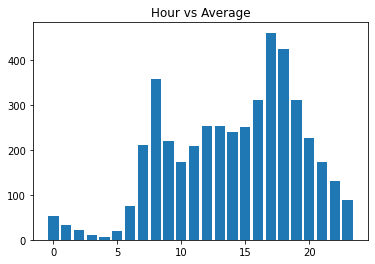

In [16]:
# Visualize hour vs demand graph in depth
plt.title('Hour vs Average')
plt.bar(hour_list, hour_average)

### Data Visulaization Analysis Result

#### Numerical Features
- Demand is not normally distributed, log/minmax transformation required
- Temperature and Demand appear to have direct correlation
- Humidity and windspeed affect demand but need more statistical analysis, such as checking for correlation coefficient.

#### Categorical Features
- Variation in demand based on Season, Month, Holiday, Hour, Weather
- We concluded that bikes should be stationed at public transport hubs in the morning and at workplaces during the evening.
- No significant change in demand due to weekday or working day
- Year-wise growth not considered due to limited data.



### Step 4
Check for assumptions

In [17]:
# Check for Outliers
bikes_prep['demand'].describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: demand, dtype: float64

In [18]:
bikes_prep['demand'].quantile([0.05, 0.1, 0.15, 0.9, 0.95, 0.99])

0.05      5.00
0.10      9.00
0.15     16.00
0.90    451.20
0.95    563.10
0.99    782.22
Name: demand, dtype: float64

In [19]:
# Linearity using using correlation coefficient matrix (using corr)
correlation = bikes_prep[['temp', 'atemp', 'humidity', 'windspeed', 'demand']].corr()

In [20]:
correlation

,temp,atemp,humidity,windspeed,demand
temp,1.000000,0.987672,-0.069881,-0.023125,0.404772
atemp,0.987672,1.000000,-0.051918,-0.062336,0.400929
humidity,-0.069881,-0.051918,1.000000,-0.290105,-0.322911
windspeed,-0.023125,-0.062336,-0.290105,1.000000,0.093234
demand,0.404772,0.400929,-0.322911,0.093234,1.000000


### Step 5
Drop irrelevant features

In [21]:
# Columns to be dropped: atemp (multicollinearity), windspeed (low collinearity)
bikes_prep = bikes_prep.drop(['weekday', 'year', 'workingday', 'atemp', 'windspeed'], axis=1)
bikes_prep.shape

(17379, 8)

(array([-12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,
          1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12]),
 array([0.45474795, 0.47049642, 0.49622893, 0.49404147, 0.46796018,
        0.47732133, 0.5267586 , 0.59145856, 0.65201694, 0.7151968 ,
        0.8059117 , 0.9253113 , 1.        , 0.9253113 , 0.8059117 ,
        0.7151968 , 0.65201694, 0.59145856, 0.5267586 , 0.47732133,
        0.46796018, 0.49404147, 0.49622893, 0.47049642, 0.45474795],
       dtype=float32),
 <matplotlib.lines.Line2D at 0x7f851fa8a090>)

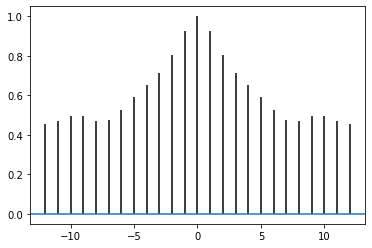

In [22]:
# Test autocorrelation in demand using acorr
df1 = pd.to_numeric(bikes_prep['demand'], downcast='float')
plt.acorr(df1, maxlags=12)

In [23]:
# There is autocorrelation for demand feature

### Step 6
Create/Modify new features

In [24]:
# Log normalise 'demand'

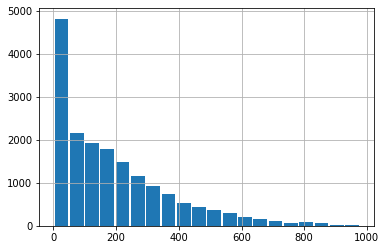

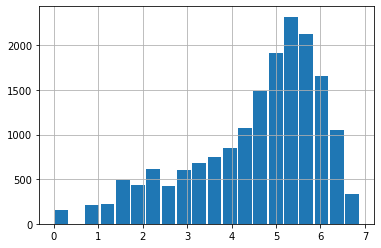

In [25]:
df1 = bikes_prep['demand']
df2 = np.log(df1)

plt.figure()
df1.hist(rwidth = 0.9, bins=20)

plt.figure()
df2.hist(rwidth = 0.9, bins=20)

plt.show()

In [26]:
bikes_prep['demand'] = np.log(bikes_prep['demand'])

In [27]:
# Autocorrelation in the demand column
t_1 = bikes_prep['demand'].shift(+1).to_frame()
t_1.columns = ['t-1']

t_2 = bikes_prep['demand'].shift(+2).to_frame()
t_2.columns = ['t-2']

t_3 = bikes_prep['demand'].shift(+3).to_frame()
t_3.columns = ['t-3']

bikes_prep_lag = pd.concat([bikes_prep, t_1, t_2, t_3], axis=1)
bikes_prep_lag.head(20)

,season,month,hour,holiday,weather,temp,humidity,demand,t-1,t-2,t-3
0,1,1,0,0,1,0.24,0.81,2.772589,NaN,NaN,NaN
1,1,1,1,0,1,0.22,0.80,3.688879,2.772589,NaN,NaN
2,1,1,2,0,1,0.22,0.80,3.465736,3.688879,2.772589,NaN
3,1,1,3,0,1,0.24,0.75,2.564949,3.465736,3.688879,2.772589
4,1,1,4,0,1,0.24,0.75,0.000000,2.564949,3.465736,3.688879
5,1,1,5,0,2,0.24,0.75,0.000000,0.000000,2.564949,3.465736
6,1,1,6,0,1,0.22,0.80,0.693147,0.000000,0.000000,2.564949
7,1,1,7,0,1,0.20,0.86,1.098612,0.693147,0.000000,0.000000
8,1,1,8,0,1,0.24,0.75,2.079442,1.098612,0.693147,0.000000
9,1,1,9,0,1,0.32,0.76,2.639057,2.079442,1.098612,0.693147


In [28]:
bikes_prep_lag = bikes_prep_lag.dropna()

### Step 7
Create dummy variables and drop first to avoid dummy variables trap using get_dummies

In [29]:
# First convert the required columns to categorical type
# season, holiday, weather, month, hour
bikes_prep_lag['season'] = bikes_prep_lag['season'].astype('category')
bikes_prep_lag['holiday'] = bikes_prep_lag['holiday'].astype('category')
bikes_prep_lag['weather'] = bikes_prep_lag['weather'].astype('category')
bikes_prep_lag['month'] = bikes_prep_lag['month'].astype('category')
bikes_prep_lag['hour'] = bikes_prep_lag['hour'].astype('category')

bikes_prep_lag = pd.get_dummies(bikes_prep_lag, drop_first=True)

In [30]:
bikes_prep_lag.head(20)

,temp,humidity,demand,t-1,t-2,t-3,season_2,season_3,season_4,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,holiday_1,weather_2,weather_3,weather_4
3,0.24,0.75,2.564949,3.465736,3.688879,2.772589,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.24,0.75,0.000000,2.564949,3.465736,3.688879,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0.24,0.75,0.000000,0.000000,2.564949,3.465736,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
6,0.22,0.80,0.693147,0.000000,0.000000,2.564949,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0.20,0.86,1.098612,0.693147,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0.24,0.75,2.079442,1.098612,0.693147,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0.32,0.76,2.639057,2.079442,1.098612,0.693147,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,0.38,0.76,3.583519,2.639057,2.079442,1.098612,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11,0.36,0.81,4.025352,3.583519,2.639057,2.079442,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12,0.42,0.77,4.430817,4.025352,3.583519,2.639057,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Step 8
Create Train and Test Split

In [31]:
from pandas.core.common import random_state
# Split the X and Y dataset into training and testing set
# from sklearn.model_selection import train_test_split
# x_train, x_train, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state=1234)

# demand is time dependent or time series 
y = bikes_prep_lag[['demand']]
x = bikes_prep_lag.drop(['demand'], axis=1)

# Size for 70% of data
tr_size = 0.7*len(x)
tr_size = int(tr_size)

x_train = x.values[0: tr_size]
x_test = x.values[tr_size:]
y_train = y.values[0: tr_size]
y_test = y.values[tr_size:]

### Step 9
Fit and score the model

In [32]:
from sklearn.linear_model import LinearRegression

std_reg = LinearRegression()
std_reg.fit(x_train, y_train)

r2_train = std_reg.score(x_train, y_train)
r2_test = std_reg.score(x_test, y_test)

# Create predictions
y_predict = std_reg.predict(x_test)

from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(y_test, y_predict))
rmse

0.38098800498170443

### Final Step
Calculate RMSLE

In [33]:
y_test_e = []
y_predict_e = []

for i in range(0, len(y_test)):
  y_test_e.append(math.exp(y_test[i]))
  y_predict_e.append(math.exp(y_predict[i]))

# Sum of logs and squares
log_sq_sum = 0.0

for i in range(0, len(y_test_e)):
  log_a = math.log(y_test_e[i]+1)
  log_p = math.log(y_predict_e[i]+1)
  log_diff = (log_p - log_a)**2
  log_sq_sum += log_diff

rmsle = math.sqrt(log_sq_sum/len(y_test))
rmsle


0.3560941706980211